### We'll be doing some sentiment analysis on the tweets provided here

#### Lets start with some EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
import nltk
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_excel('./ML Assignment Dataset.xlsx')

In [3]:
# Read multiple specific sheets
sheet_names = ['Dataset Card', 'Train', 'Test']
data = pd.read_excel('./ML Assignment Dataset.xlsx', sheet_name=sheet_names)

df_desc = data['Dataset Card']
df_train = data['Train']
df_test = data['Test']

In [4]:
df_desc.head()

,Dataset description,"Users assessed tweets related to various brands and products, providing evaluations on whether the sentiment conveyed was positive, negative, or neutral. Additionally, if the tweet conveyed any sentiment, contributors identified the specific brand or product targeted by that emotion."
0,Columns,tweet_text\nemotion_in_tweet_is_directed_at\ni...


In [5]:
df_traindemo = pd.read_csv('./ML Assignment Dataset - Train.csv')
df_with_null_emotions = df_traindemo[df_traindemo['emotion_in_tweet_is_directed_at'].isnull()]
df_with_null_emotions.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product


In [6]:
# Count the number of rows where both 'tweet_text' and 'emotion_in_tweet_is_directed_at' are null

null_count = df_with_null_emotions[df_with_null_emotions['tweet_text'].isnull() & df_with_null_emotions['emotion_in_tweet_is_directed_at'].isnull()].shape[0]
print(f"Number of rows where both 'tweet_text' and 'emotion_in_tweet_is_directed_at' are null: {null_count}")

Number of rows where both 'tweet_text' and 'emotion_in_tweet_is_directed_at' are null: 1


In [7]:
df_train.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
# This step is to be done after entire notebook is run 
df_train.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [9]:
rows_with_missing_values = df_train[df_train.isnull().any(axis=1)]
rows_with_missing_values.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product


In [10]:
df_test.head()

,Tweet
0,Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1,Again? RT @mention Line at the Apple store is ...
2,Boooo! RT @mention Flipboard is developing an ...
3,Thanks to @mention for publishing the news of ...
4,���@mention &quot;Apple has opened a pop-up st...


In [11]:
df_train.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5298
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [12]:
df_train.value_counts()

tweet_text                                                                                                                                        emotion_in_tweet_is_directed_at  is_there_an_emotion_directed_at_a_brand_or_product
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                    Google                           Positive emotion                                      3
Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW  Android App                      Positive emotion                                      2
Before It Even Begins, Apple Wins #SXSW {link}                                                                                                    Apple                            Positive emotion                                      2
Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesom

In [13]:
df_train.shape

(8589, 3)

In [14]:
df_train.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [15]:
df_train.rename(columns={'emotion_in_tweet_is_directed_at': 'brand_chosen', 'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [16]:
def map_to_categories(label):
    if label in ['Negative emotion', 'negative']:
        return 'negative'
    elif label in ['positive emotion', 'positive']:
        return 'positive'
    else:  # Includes 'No emotion toward brand or product', 'I can't tell', and other unspecified labels
        return 'neutral'

df_train['emotion'] = df_train['emotion'].apply(map_to_categories)

In [17]:
df_train.columns

Index(['tweet_text', 'brand_chosen', 'emotion'], dtype='object')

##### Tweet Text Analysis

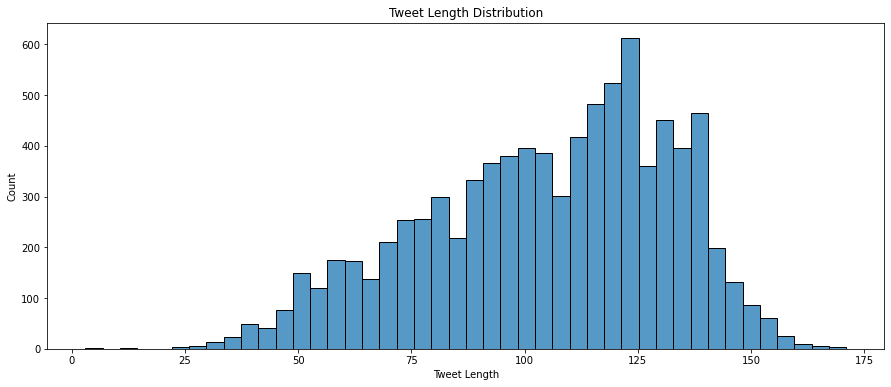

In [18]:

df_train['tweet_text'] = df_train['tweet_text'].astype(str)
df_train['tweet_length'] = df_train['tweet_text'].apply(len)
plt.figure(figsize=(15, 6))
sns.histplot(x=df_train['tweet_length'])

plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.title('Tweet Length Distribution')
plt.show()


##### Emotion Analysis

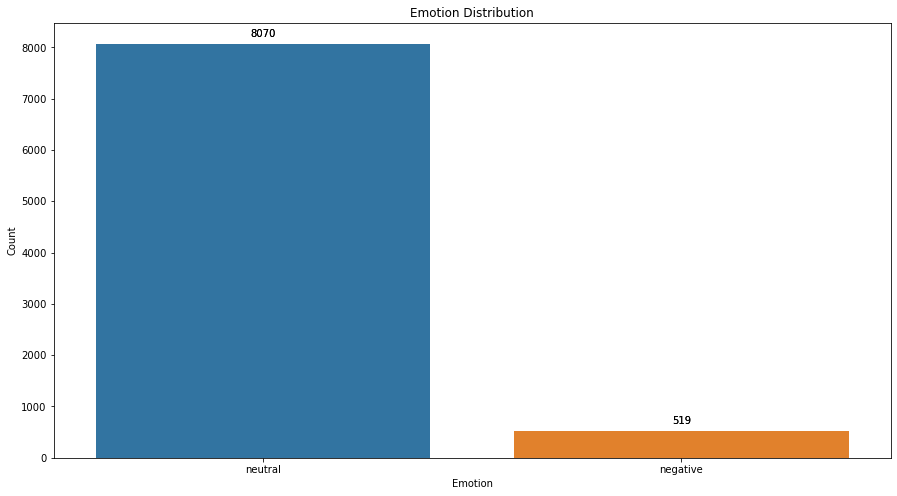

In [19]:

emotion_counts = df_train['emotion'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
ax_emotion = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')

for p in ax_emotion.patches:
    ax_emotion.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()


In [20]:
df_train.shape

(8589, 4)

##### Target Brand/Product Analysis

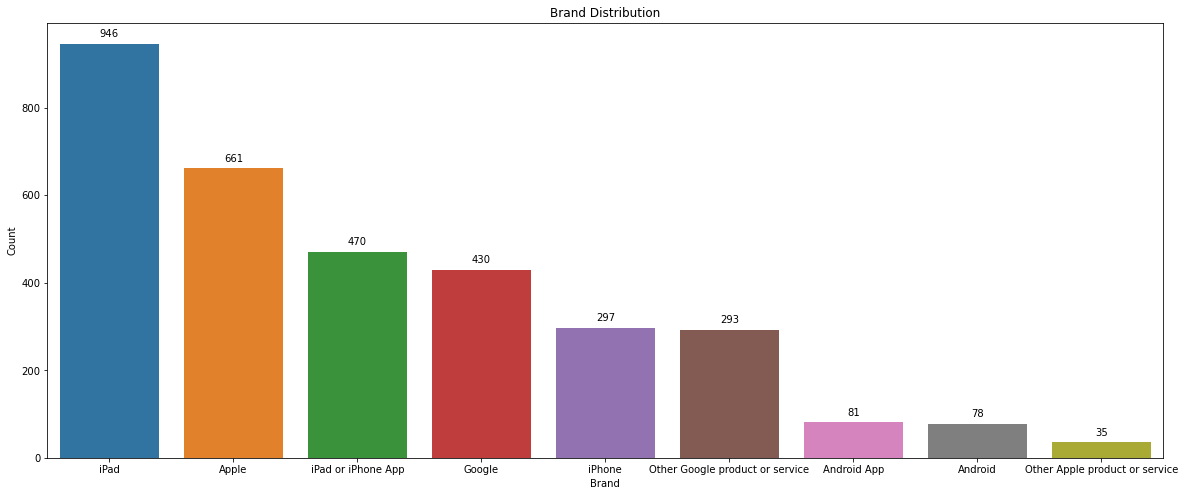

In [21]:
brand_counts = df_train['brand_chosen'].value_counts()
plt.figure(figsize=(20, 8))
ax_brand = sns.barplot(x=brand_counts.index, y=brand_counts.values)

plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')

for p in ax_brand.patches:
    ax_brand.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()


##### Data Quality Check

In [22]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_text    8589 non-null   object
 1   brand_chosen  3291 non-null   object
 2   emotion       8589 non-null   object
 3   tweet_length  8589 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 268.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   504 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
None


##### Checking for %age of missing values

In [23]:
missing_percentage_train = df_train.isnull().sum() / len(df_train) * 100
print("Missing values percentage in df_train:")
print(missing_percentage_train.apply(lambda x: f'{x:.2f}%'))

missing_percentage_test = df_test.isnull().sum() / len(df_test) * 100
print("\nMissing values percentage in df_test:")
print(missing_percentage_test.apply(lambda x: f'{x:.2f}%'))

Missing values percentage in df_train:
tweet_text       0.00%
brand_chosen    61.68%
emotion          0.00%
tweet_length     0.00%
dtype: object

Missing values percentage in df_test:
Tweet    0.00%
dtype: object


##### Checking for duplicate entries

In [24]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

22
0


#### Dataset Improvement Suggestions:
Handling Missing Values: Fill or remove rows with missing data, especially in the 'emotion_in_tweet_is_directed_at' column.\
Balancing Classes: If there's a class imbalance in emotions, consider techniques like oversampling.\
Adding More Features: Such as sentiment score, word count, or specific features extracted from the text.\
Data Augmentation: Use techniques like synonym replacement, back translation, etc., to augment the dataset.

#### Model Training and Fine-Tuning:
Proposed Approach:
Preprocessing: Tokenization, padding, and possibly embedding.\
Model Selection: Utilize a pre-trained transformer model like BERT or RoBERTa.\
Fine-Tuning: Adjust the model to our specific dataset, focusing on both emotion and product prediction.\
Training: Train the model on the training dataset.

#### Model Evaluation:
Metrics: Use accuracy, precision, recall, and F1-score to evaluate model performance.\
Confusion Matrix: To understand the performance for each class.

#### Deployment and Monitoring:
Serving the Model: Use Flask or FastAPI for serving the model. Create an API endpoint that receives a tweet text and returns the predicted emotion and product.\
Deployment Requirements: Docker container, cloud service (AWS, GCP, Azure), and a CI/CD pipeline for seamless deployment.\
Monitoring Metrics: Latency, throughput, error rate, and model drift. Use tools like Prometheus, Grafana, or cloud-specific monitoring tools.\
Continuous Evaluation: Regularly evaluate the model with new data and update the model as needed.

<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>

### NLTK snooping

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Download stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stop words
stop_words = set(stopwords.words('english'))
words = []
for tweet in df_train['tweet_text'].astype(str):
    for word in word_tokenize(tweet):
        if word.isalpha() and word.lower() not in stop_words:
            words.append(word.lower())

# Count frequency of each word
word_freq = pd.Series(words).value_counts()

# Get top 10 most frequent words
top_10_words = word_freq.head(10)

print(top_10_words)

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


[nltk_data] Error loading stopwords: [WinError 10060] A connection
[nltk_data]     attempt failed because the connected party did not
[nltk_data]     properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond


sxsw       9001
mention    6739
link       4121
rt         2812
google     2430
ipad       2312
apple      2196
quot       1591
iphone     1430
store      1410
dtype: int64


In [26]:
df_train.head()

,tweet_text,brand_chosen,emotion,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,neutral,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,neutral,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,neutral,131


Basic NLTK

In [27]:
example = df_train['tweet_text'][1]
print(example)

@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW


In [28]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['@',
 'jessedee',
 'Know',
 'about',
 '@',
 'fludapp',
 '?',
 'Awesome',
 'iPad/iPhone',
 'app']

In [29]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('@', 'JJ'),
 ('jessedee', 'NN'),
 ('Know', 'NNP'),
 ('about', 'IN'),
 ('@', 'NNP'),
 ('fludapp', 'NN'),
 ('?', '.'),
 ('Awesome', 'NNP'),
 ('iPad/iPhone', 'NN'),
 ('app', 'NN')]

In [30]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  @/JJ
  jessedee/NN
  Know/NNP
  about/IN
  @/NNP
  fludapp/NN
  ?/.
  Awesome/NNP
  iPad/iPhone/NN
  app/NN
  that/IN
  you/PRP
  'll/MD
  likely/RB
  appreciate/VB
  for/IN
  its/PRP$
  design/NN
  ./.
  Also/RB
  ,/,
  they/PRP
  're/VBP
  giving/VBG
  free/JJ
  Ts/NNP
  at/IN
  #/#
  (ORGANIZATION SXSW/NNP))


### VADER Sentiment Scoring

**VADER:** Valence Aware Dictonary and sEntiment Reasoner

I'll use NLTK's `SentimentIntensityAnalyzer` to get the negative (neg), neutral (neu) and positive (pos) scores for the text.

**Approach:**
- Uses a "bag of words" approach
- Stop words are removed - words like (is, the, am, etc.)
- Each word is scored and combined to a total score to get a overall sentiment score of text.

**Limitations:** 
- Does not account for relationships between words, which is an important part of human speech.

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [32]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [33]:
sia.polarity_scores('This Waze vs Google discussion is one of the best I have seen at ')

{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.6369}

In [34]:
sia.polarity_scores('What are you so angry about?')

{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.6418}

In [35]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.91}

#### Run the polarity score on the entire dataset

In [36]:
df_train.shape[0]

8589

In [37]:
res = {} 
# dictionary to store these results we get from code below

for index, row in tqdm(df_train.iterrows(), total=len(df_train)):
    text = row['tweet_text']
    # Use the DataFrame index as the key
    res[index] = sia.polarity_scores(text)

  0%|          | 0/8589 [00:00<?, ?it/s]

In [38]:
df_train.head()

,tweet_text,brand_chosen,emotion,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,neutral,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,neutral,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,neutral,131


In [39]:
# Convert the res dictionary to a DataFrame
vaders = pd.DataFrame.from_dict(res, orient='index')

# Reset the index of the DataFrame and rename the index column
vaders = vaders.reset_index().rename(columns={'index': 'id'})

# Merge with df_train using 'Id' from vaders and index from df_train
vaders = vaders.merge(df_train, left_on='id', right_index=True)


In [40]:
vaders.head()

,id,neg,neu,pos,compound,tweet_text,brand_chosen,emotion,tweet_length
0,0,0.203,0.797,0.000,-0.6800,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,127
1,1,0.000,0.576,0.424,0.9100,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,neutral,139
2,2,0.000,1.000,0.000,0.0000,@swonderlin Can not wait for #iPad 2 also. The...,iPad,neutral,79
3,3,0.000,0.663,0.337,0.7269,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,82
4,4,0.000,0.796,0.204,0.6249,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,neutral,131


#### Plot VADER results

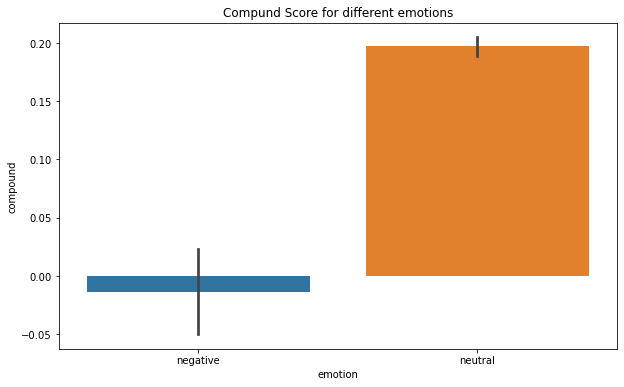

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vaders, x='emotion', y='compound')
ax.set_title('Compund Score for different emotions')
plt.show()

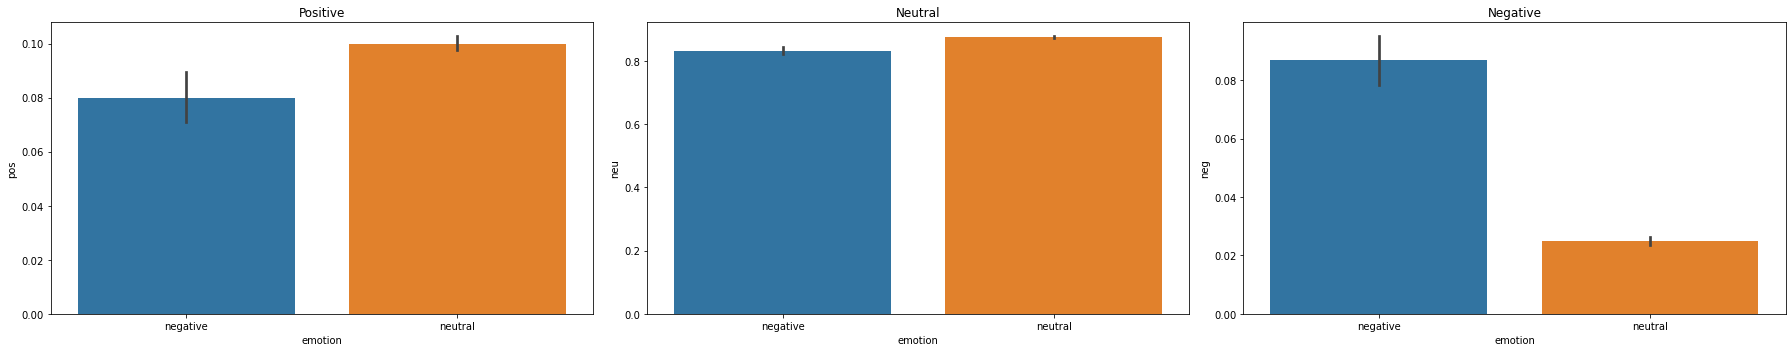

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
sns.barplot(data=vaders, x='emotion', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='emotion', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='emotion', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [43]:
import transformers
transformers.__version__

'4.20.1'

RandomForest Approach A

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

# Assume df_train is your preprocessed DataFrame

# Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
df_train['processed_text'] = df_train['tweet_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower()) for word in x.split() if word.lower() not in stop_words]))

# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_train['processed_text'])
y = df_train['emotion']  # Assuming 'emotion' is the target column

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')


              precision    recall  f1-score   support

    negative       0.61      0.17      0.26       103
     neutral       0.95      0.99      0.97      1615

    accuracy                           0.94      1718
   macro avg       0.78      0.58      0.62      1718
weighted avg       0.93      0.94      0.93      1718

Accuracy score: 0.9435389988358557


RandomForest Approach B

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_and_stem(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    return ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])

df_train['processed_text'] = df_train['tweet_text'].apply(clean_and_stem)

# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_train['processed_text'])
y = df_train['emotion']

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

    negative       0.64      0.20      0.31       103
     neutral       0.95      0.99      0.97      1615

    accuracy                           0.95      1718
   macro avg       0.79      0.60      0.64      1718
weighted avg       0.93      0.95      0.93      1718

Accuracy score: 0.9452852153667055


In [46]:
# Predicting sentiment of a single instance
single_instance = "Your sample text here for sentiment analysis"
# Preprocess the text
processed_instance = clean_and_stem(single_instance)
# Vectorize the text
vectorized_instance = vectorizer.transform([processed_instance])
# Predict
predicted_sentiment = model.predict(vectorized_instance)
print(f'Predicted sentiment: {predicted_sentiment[0]}')

Predicted sentiment: neutral


VADER Approach

In [47]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER
def classify_sentiment(row):
    compound_score = sia.polarity_scores(row)['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER to each tweet
df_train['predicted_sentiment'] = df_train['tweet_text'].apply(classify_sentiment)

# Evaluate the performance
y_true = df_train['emotion']
y_pred = df_train['predicted_sentiment']
print(classification_report(y_true, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')


              precision    recall  f1-score   support

    negative       0.19      0.39      0.26       519
     neutral       0.96      0.45      0.61      8070
    positive       0.00      0.00      0.00         0

    accuracy                           0.44      8589
   macro avg       0.38      0.28      0.29      8589
weighted avg       0.91      0.44      0.59      8589

Accuracy: 0.44335778321108393


: 